# Viral barcode replicate correlation
This notebook plots the correlation between technical replicates of raw viral barcode sequencing data. Data source is supernatant or second infection.

Import Python modules:

In [1]:
from IPython.display import display

import gzip

import pandas as pd

import plotnine as p9

Hardcode variables for now:

In [2]:
expt = 'scProgenyProduction_trial1'
viral_bc_in_progeny_csv = 'results/viral_progeny/scProgenyProduction_trial1_viral_bc_in_progeny.csv.gz'

Load viral barcode counts and pivot dataframe so replicates in two columns.

In [12]:
viral_barcode_counts = pd.read_csv(gzip.open(viral_bc_in_progeny_csv))
display(viral_barcode_counts)

,source,tag,gene,replicate,barcode,count
0,second_infection,syn,fluHA,replicate_1,GTCAATCAAGATAAGA,7879
1,second_infection,syn,fluHA,replicate_1,CATTTACGCTGAATTG,4246
2,second_infection,syn,fluHA,replicate_1,AGCTTGGCATGAAAGA,3661
3,second_infection,syn,fluHA,replicate_1,CTTCCACTTACAATGT,2163
4,second_infection,syn,fluHA,replicate_1,ATCGCTATATGAATCC,1691
...,...,...,...,...,...,...
133365,supernatant,wt,fluNA,replicate_2,TTTTATTTATTGACGG,1
133366,supernatant,wt,fluNA,replicate_2,TTTTCAGATTTACGCA,1
133367,supernatant,wt,fluNA,replicate_2,TTTTCGGGTTATTTTG,1
133368,supernatant,wt,fluNA,replicate_2,TTTTGATGGTAAGTTC,1


,source,tag,gene,barcode,replicate_1_count,replicate_2_count
0,second_infection,syn,fluHA,AAAAAACGAAGGGATT,1.0,0.0
1,second_infection,syn,fluHA,AAAAAACGAATGGATC,0.0,1.0
2,second_infection,syn,fluHA,AAAAAACGAATGGATT,225.0,184.0
3,second_infection,syn,fluHA,AAAAAATATTCATACG,1.0,0.0
4,second_infection,syn,fluHA,AAAAAATCGGTAGAGG,1.0,0.0
...,...,...,...,...,...,...
103158,supernatant,wt,fluNA,TTTTTACTTTACGAGC,1.0,0.0
103159,supernatant,wt,fluNA,TTTTTCGTAAAACTAT,134.0,0.0
103160,supernatant,wt,fluNA,TTTTTGACTCGAAGTA,0.0,402.0
103161,supernatant,wt,fluNA,TTTTTGGAATACGCAA,139.0,0.0


### Plots
Set theme for plots.

In [60]:
p9.theme_set(p9.theme_classic())

Plot number of barcodes identified for each sample:

,source,tag,gene,replicate,n_unique_barcodes
0,second_infection,syn,fluHA,replicate_1,8787
1,second_infection,syn,fluHA,replicate_2,8447
2,second_infection,syn,fluNA,replicate_1,8318
3,second_infection,syn,fluNA,replicate_2,8001
4,second_infection,wt,fluHA,replicate_1,11781
5,second_infection,wt,fluHA,replicate_2,11725
6,second_infection,wt,fluNA,replicate_1,10774
7,second_infection,wt,fluNA,replicate_2,10443
8,supernatant,syn,fluHA,replicate_1,8794
9,supernatant,syn,fluHA,replicate_2,9260


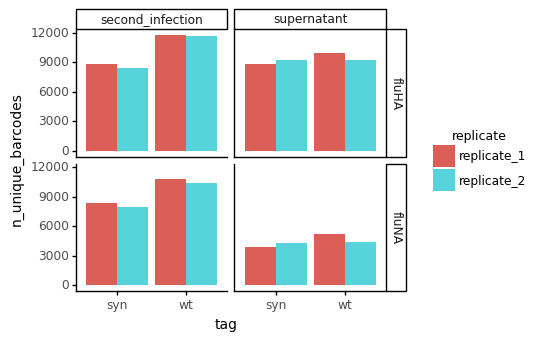

<ggplot: (8764339815045)>

In [66]:
n_barcodes_df = (viral_barcode_counts
                 .groupby(['source','tag','gene','replicate'])['barcode']
                 .nunique()
                 .reset_index()
                 .rename(columns={'barcode':'n_unique_barcodes'}))
                 
display(n_barcodes_df)

fig = (p9.ggplot(n_barcodes_df, p9.aes(x='tag',
                                       y='n_unique_barcodes',
                                       fill='replicate')) +
       p9.geom_bar(stat='identity', position='position_dodge') +
       p9.facet_grid('gene~source') + 
       p9.theme(figure_size=(2*n_barcodes_df['gene'].nunique(),
                             1.7*n_barcodes_df['source'].nunique()),
                plot_title=p9.element_text(size=10),
                axis_title=p9.element_text(size=10),
                legend_title=p9.element_text(size=9),
                legend_title_align='center'))
fig

Plot histogram for each sample:

/fh/fast/bloom_j/software/miniconda3/envs/barcoded_flu_pdmH1N1/lib/python3.8/site-packages/plotnine/layer.py:372: PlotnineWarning: stat_bin : Removed 7 rows containing non-finite values.
/fh/fast/bloom_j/software/miniconda3/envs/barcoded_flu_pdmH1N1/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
/fh/fast/bloom_j/software/miniconda3/envs/barcoded_flu_pdmH1N1/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_histogram : Removed 300 rows containing missing values.


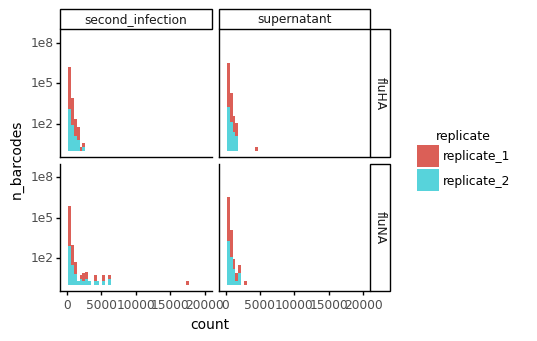

<ggplot: (8764340726363)>

In [78]:
fig = (p9.ggplot(viral_barcode_counts, p9.aes(x='count',
                                        fill='replicate')) +
       p9.geom_histogram(bins=50) +
       p9.facet_grid('gene~source') + 
       p9.scale_y_log10() +
       p9.xlim(0,20000) +
       p9.theme(figure_size=(2*n_barcodes_df['gene'].nunique(),
                             1.7*n_barcodes_df['source'].nunique()),
                plot_title=p9.element_text(size=10),
                axis_title=p9.element_text(size=10),
                legend_title=p9.element_text(size=9),
                legend_title_align='center') +
       p9.ylab('n_barcodes'))
fig

,source,tag,gene,barcode,replicate_1_count,replicate_2_count
0,second_infection,syn,fluHA,AAAAAACGAAGGGATT,1.0,0.5
1,second_infection,syn,fluHA,AAAAAACGAATGGATC,0.5,1.0
2,second_infection,syn,fluHA,AAAAAACGAATGGATT,225.0,184.0
3,second_infection,syn,fluHA,AAAAAATATTCATACG,1.0,0.5
4,second_infection,syn,fluHA,AAAAAATCGGTAGAGG,1.0,0.5
...,...,...,...,...,...,...
103158,supernatant,wt,fluNA,TTTTTACTTTACGAGC,1.0,0.5
103159,supernatant,wt,fluNA,TTTTTCGTAAAACTAT,134.0,0.5
103160,supernatant,wt,fluNA,TTTTTGACTCGAAGTA,0.5,402.0
103161,supernatant,wt,fluNA,TTTTTGGAATACGCAA,139.0,0.5


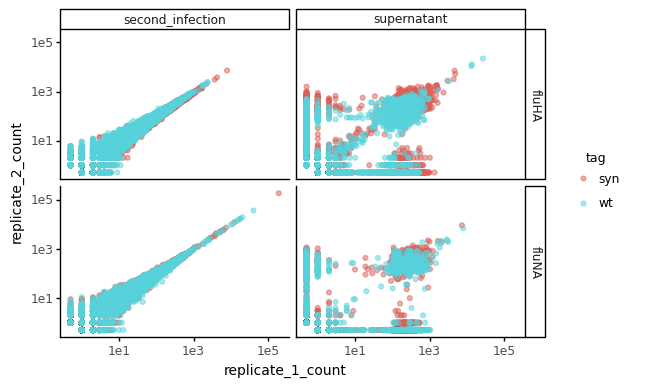

<ggplot: (8764315465530)>

In [91]:
viral_barcode_counts_wide = (viral_barcode_counts
                             .pivot_table(index=['source',
                                                 'tag',
                                                 'gene',
                                                 'barcode'],
                                          columns='replicate',
                                          values='count')
                            .reset_index()
                            .fillna(0.5))
viral_barcode_counts_wide.columns = ['source',
                                     'tag',
                                     'gene',
                                     'barcode',
                                     'replicate_1_count',
                                     'replicate_2_count']
display(viral_barcode_counts_wide)

fig = (p9.ggplot(viral_barcode_counts_wide, p9.aes(x='replicate_1_count',
                                                   y='replicate_2_count',
                                                   color='tag')) +
       p9.geom_point(alpha=0.5) +
       p9.facet_grid('gene~source') + 
       p9.scale_x_log10() +
       p9.scale_y_log10() +
       p9.theme(figure_size=(3*n_barcodes_df['gene'].nunique(),
                             2*n_barcodes_df['source'].nunique()),
                plot_title=p9.element_text(size=10),
                axis_title=p9.element_text(size=10),
                legend_title=p9.element_text(size=9),
                legend_title_align='center'))
fig